In [1]:
# from vision import Vision
from globalPlanning import GlobalPlanning
from localPlanning import LocalPlanning
from thymioControl import ThymioControl
from kalman import Kalman
from plotter import Plotter

import numpy as np
import math
import time

In [2]:
!pip3 install tdmclient --upgrade

In [3]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [4]:
import time

@tdmclient.notebook.sync_var
def motor_go(left,right):
    global motor_left_target, motor_right_target
    motor_left_target = left
    motor_right_target = right
    
@tdmclient.notebook.sync_var
def motor_stop():
    global motor_left_target,motor_right_target
    motor_left_target = 0
    motor_right_target = 0
    
@tdmclient.notebook.sync_var
def sensor_data():
    global prox_horizontal
    return prox_horizontal.copy()

@tdmclient.notebook.sync_var
def leds_off():
    global leds_top, leds_bottom_left, leds_bottom_right, leds_circle
    leds_top = [0, 0, 0]
    leds_bottom_left = [0, 0, 0]
    leds_bottom_right = [0, 0, 0]
    leds_circle = [0, 0, 0, 0, 0, 0, 0, 0]

def leds_go_crazy():
    for i in range(8):
        leds_1()
        time.sleep(0.1)
        leds_2()
        time.sleep(0.1)
        leds_3()
        time.sleep(0.1)

@tdmclient.notebook.sync_var
def leds_1():
    global leds_top, leds_bottom_left, leds_bottom_right, leds_circle
    leds_top = [32, 0, 0]
    leds_bottom_left = [0, 32, 0]
    leds_bottom_right = [0, 0, 32]
    leds_circle = [32, 32, 32, 32, 0, 0, 0, 0]

@tdmclient.notebook.sync_var
def leds_2():
    global leds_top, leds_bottom_left, leds_bottom_right, leds_circle
    leds_top = [0, 32, 0]
    leds_bottom_left = [0, 0, 32]
    leds_bottom_right = [32, 0, 0]
    leds_circle = [0, 0, 0, 0, 32, 32, 32, 32]

@tdmclient.notebook.sync_var
def leds_3():
    global leds_top, leds_bottom_left, leds_bottom_right, leds_circle
    leds_top = [0, 0, 32]
    leds_bottom_left = [32, 0, 0]
    leds_bottom_right = [0, 32, 0]
    leds_circle = [32, 0, 32, 0, 32, 0, 32, 0]

In [5]:
# vision = Vision()
globalPlanning = GlobalPlanning()
localPlanning = LocalPlanning()
thymio = ThymioControl()
plotter = Plotter()
filter = Kalman()

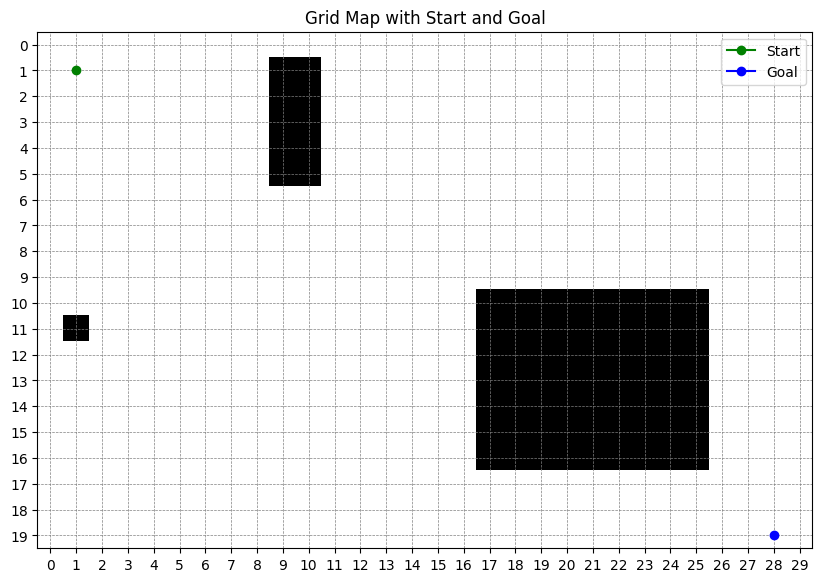

In [6]:
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)

plotter.plot_map()

In [7]:
motor_go(100, 100)

In [10]:
motor_stop()

Position:  [1, 1]
Angle:  0
First iteration
Computing path
Grid shape:  (20, 30)
Start:  (1, 1)
Goal:  (19, 28)
Path:  [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 14), (17, 14), (18, 14), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (19, 20), (19, 21), (19, 22), (19, 23), (19, 24), (19, 25), (19, 26), (19, 27), (19, 28)]


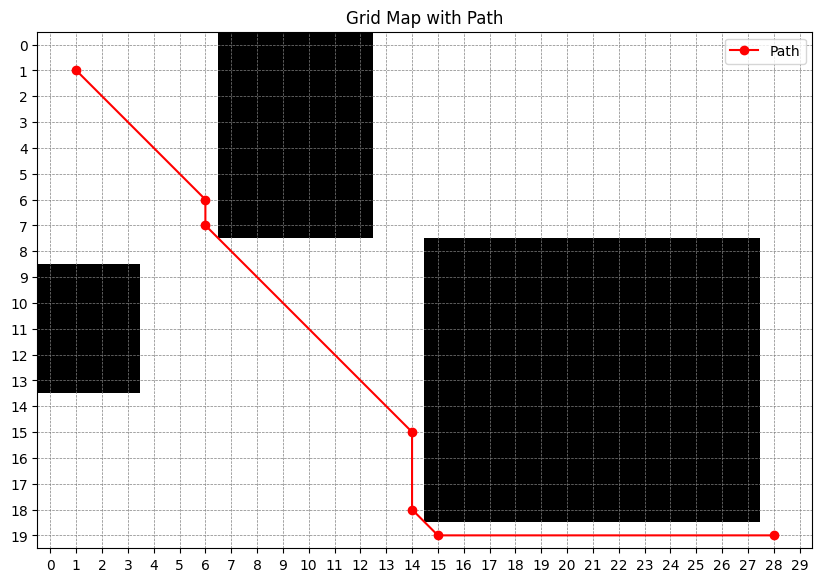

Path:  [[np.float64(1.0), np.float64(1.0)], [np.float64(6.0), np.float64(6.0)], [np.float64(7.0), np.float64(6.0)], [np.float64(15.0), np.float64(14.0)], [np.float64(18.0), np.float64(14.0)], [np.float64(19.0), np.float64(15.0)], [np.float64(19.0), np.float64(28.0)]]
Kalman position used:  [100.0, 100.0]
Kalman angle used:  0.0
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [100.0, 100.0]
x_diff:  500.0  y_diff:  500.0  distance:  707.1067811865476
my angle:  0.0
waypoint angle:  0.7853981633974483
angleDistance:  0.7853981633974483
Speed:  0.0 3.167772592369708
Motor commands:  449.9388998471302 -428.51323794964776
Kalman prediction:  (104.91571429886697, 100.0, 5.038607156338635)
calculated position:  [1.0, 1.0]
calculated angle:  0.4751658888554562
Trajectory:  [1.0] [1.0]


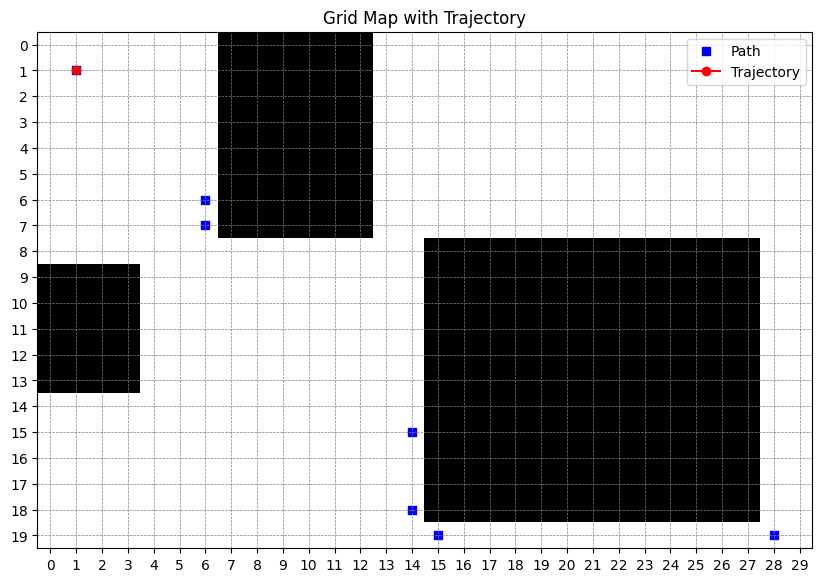

wl, wr:  449 -428
Position:  [1.0, 1.0]
Angle:  0.0
Kalman position used:  [104.91571429886697, 100.0]
Kalman angle used:  5.038607156338635
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [104.91571429886697, 100.0]
x_diff:  495.084285701133  y_diff:  500.0  distance:  703.6394317746847
my angle:  5.038607156338635
waypoint angle:  0.7903381211307581
angleDistance:  2.034916271971709
Speed:  0.0 6.283185307179586
Motor commands:  892.4407930852168 -849.9436124621112
Kalman prediction:  (281.36490620796314, -421.5687010419889, 569.4109299500959)
calculated position:  [1.0491571429886697, 1.0]
calculated angle:  5.981084952415573
Trajectory:  [1.0, 1.0] [1.0, 1.0]


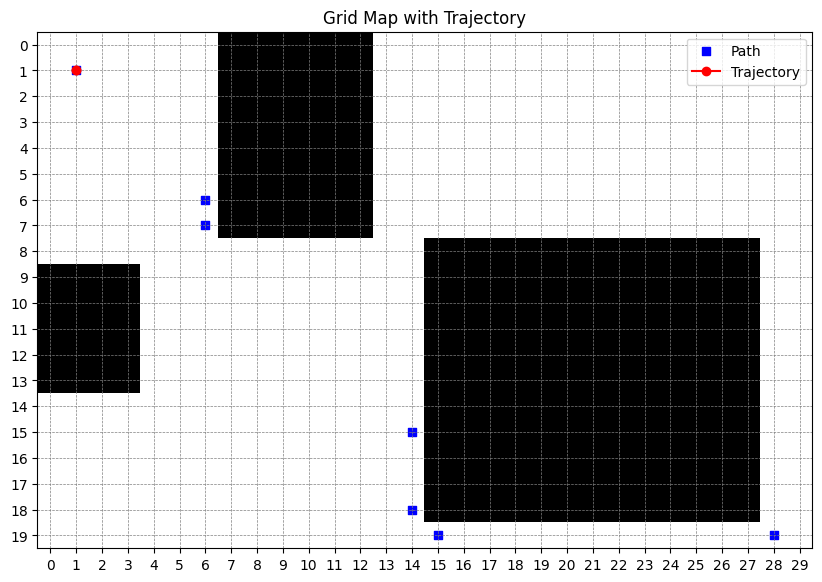

wl, wr:  892 -849
Position:  [1.0491571429886697, 1.0]
Angle:  5.038607156338635
Kalman position used:  [281.36490620796314, -421.5687010419889]
Kalman angle used:  569.4109299500959
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [281.36490620796314, -421.5687010419889]
x_diff:  318.63509379203686  y_diff:  1021.5687010419889  distance:  1070.1079076170201
my angle:  569.4109299500959
waypoint angle:  1.2684511983763507
angleDistance:  -2.6558011055567725
Speed:  0.0 -6.283185307179586
Motor commands:  -892.4407930852168 849.9436124621112
Kalman prediction:  (709.1745809672011, 3.9042422873662304, -49.037362717669225)
calculated position:  [2.8136490620796315, -4.215687010419889]
calculated angle:  2.981774507856258
Trajectory:  [1.0, 1.0, 1.0491571429886697] [1.0, 1.0, 1.0]


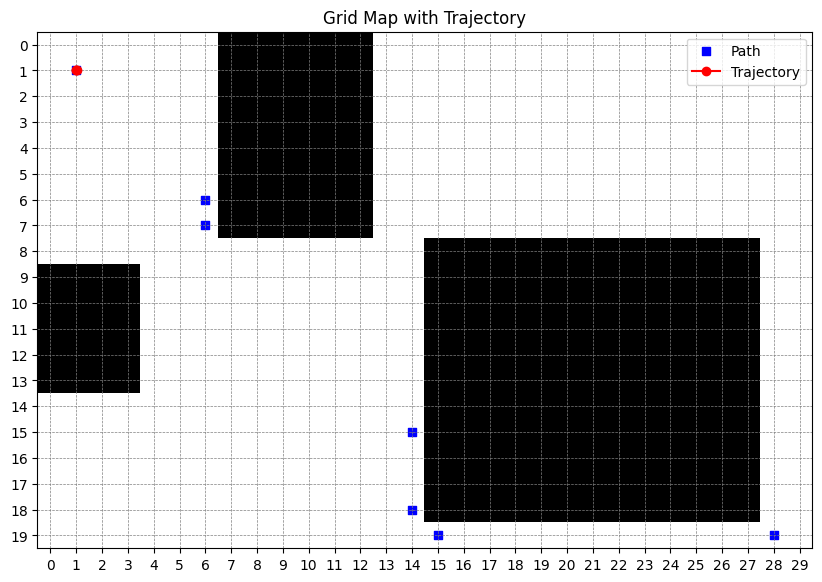

wl, wr:  -892 849
Position:  [2.8136490620796315, -4.215687010419889]
Angle:  569.4109299500959
Kalman position used:  [709.1745809672011, 3.9042422873662304]
Kalman angle used:  -49.037362717669225
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [709.1745809672011, 3.9042422873662304]
x_diff:  -109.17458096720111  y_diff:  596.0957577126337  distance:  606.0109252252495
my angle:  -49.037362717669225
waypoint angle:  1.751938144202279
angleDistance:  0.5238184044348095
Speed:  0.0 2.1127342312203985
Motor commands:  300.0850875326137 -285.7953214596321
Kalman prediction:  (774.174355232851, 186.10339311258784, 149.24517487724356)
calculated position:  [7.091745809672011, 0.0390424228736623]
calculated angle:  1.5450298744505275
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315] [1.0, 1.0, 1.0, -4.215687010419889]


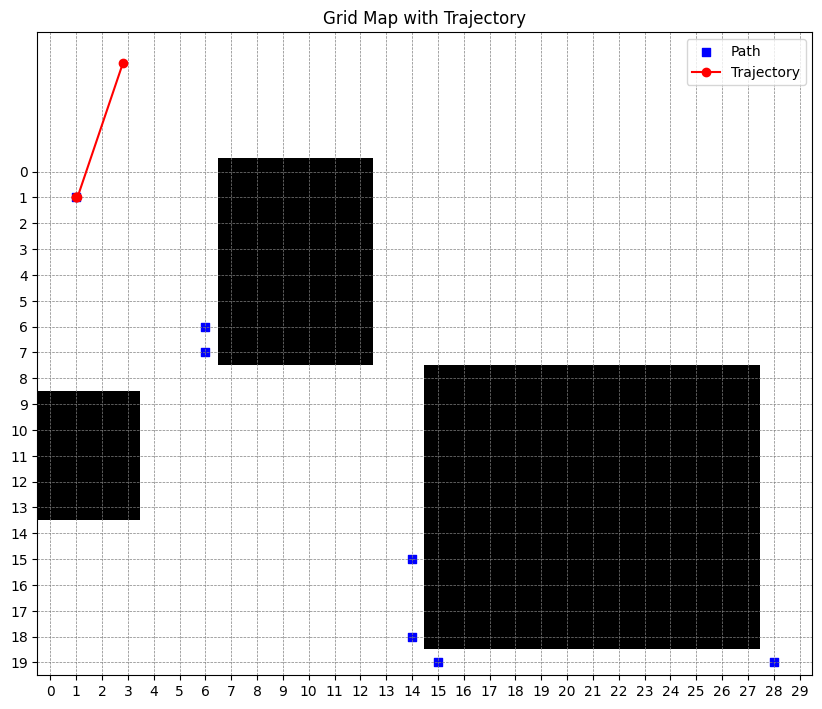

wl, wr:  300 -285
Position:  [7.091745809672011, 0.0390424228736623]
Angle:  -49.037362717669225
Kalman position used:  [774.174355232851, 186.10339311258784]
Kalman angle used:  149.24517487724356
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [774.174355232851, 186.10339311258784]
x_diff:  -174.17435523285098  y_diff:  413.8966068874122  distance:  449.0513414006158
my angle:  149.24517487724356
waypoint angle:  1.969117841363247
angleDistance:  -2.762794970749841
Speed:  0.0 -6.283185307179586
Motor commands:  -892.4407930852168 849.9436124621112
Kalman prediction:  (762.80664613263, 768.2772635140485, -447.59679078279805)
calculated position:  [7.74174355232851, 1.8610339311258783]
calculated angle:  3.789435016036144
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736623]


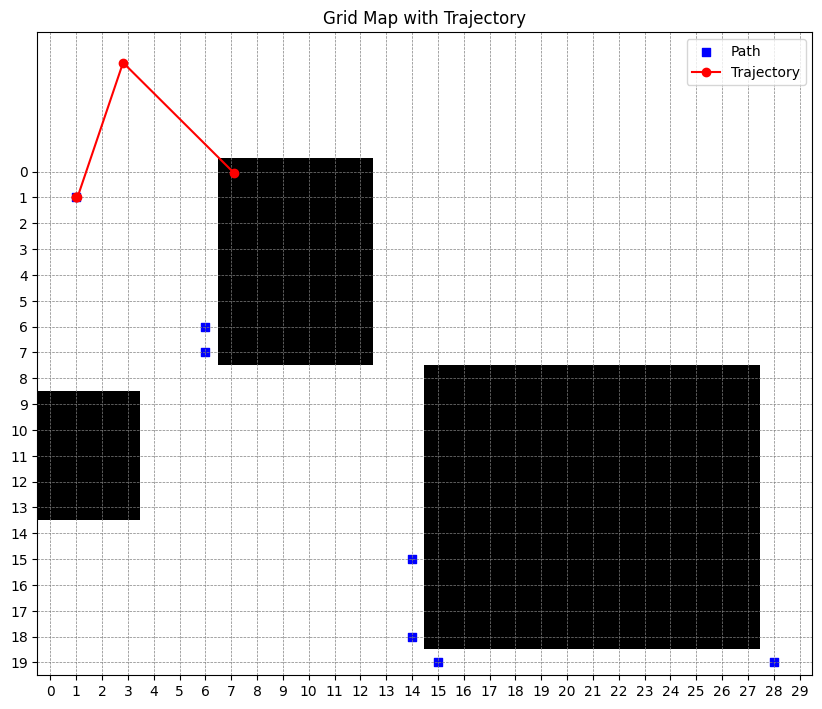

wl, wr:  -892 849
Position:  [7.74174355232851, 1.8610339311258783]
Angle:  149.24517487724356
Kalman position used:  [762.80664613263, 768.2772635140485]
Kalman angle used:  -447.59679078279805
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [762.80664613263, 768.2772635140485]
x_diff:  -162.80664613263002  y_diff:  -168.2772635140485  distance:  234.14363420928603
my angle:  -447.59679078279805
waypoint angle:  -2.339672637457878
angleDistance:  -0.8490386644104326
Speed:  0.0 -3.424455946455412
Motor commands:  -486.3972700674487 463.2354953023321
Kalman prediction:  (730.3220304583674, 1172.6441795646033, -863.4081670250613)
calculated position:  [7.6280664613263, 7.682772635140485]
calculated angle:  4.278882942163818
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736623, 1.8610339311258783]


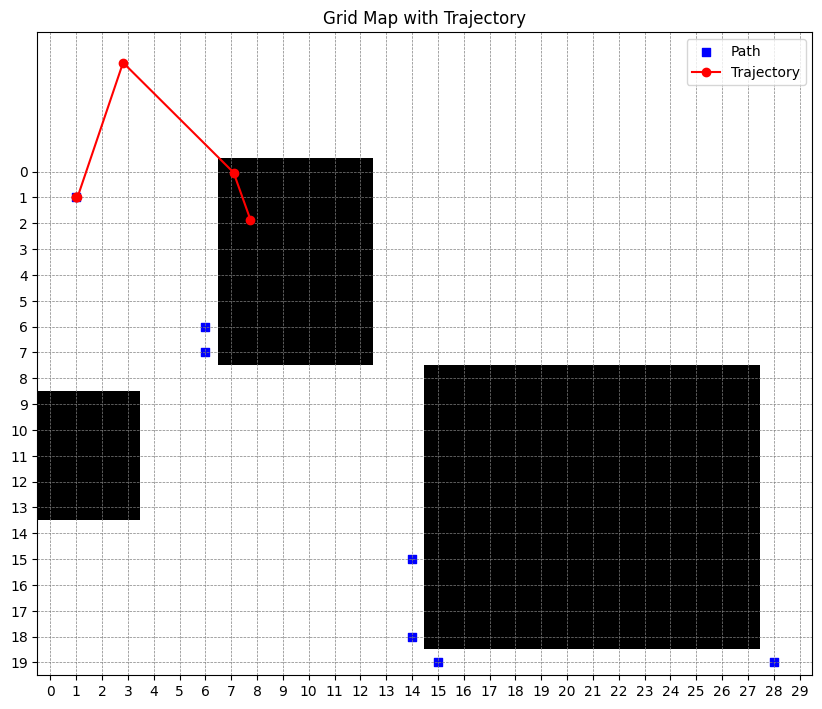

wl, wr:  -486 463
Position:  [7.6280664613263, 7.682772635140485]
Angle:  -447.59679078279805
Kalman position used:  [730.3220304583674, 1172.6441795646033]
Kalman angle used:  -863.4081670250613
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [730.3220304583674, 1172.6441795646033]
x_diff:  -130.3220304583674  y_diff:  -572.6441795646033  distance:  587.2862913537224
my angle:  -863.4081670250613
waypoint angle:  -1.7945645381764825
angleDistance:  0.8172154032814909
Speed:  0.0 3.29610212656868
Motor commands:  468.16636023190046 -445.87272403038145
Kalman prediction:  (481.55266170407185, 1026.9485536146508, -567.906845796484)
calculated position:  [7.303220304583674, 11.726441795646032]
calculated angle:  4.165820684706873
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736623, 1.8610339311258783, 7.682772635140485]


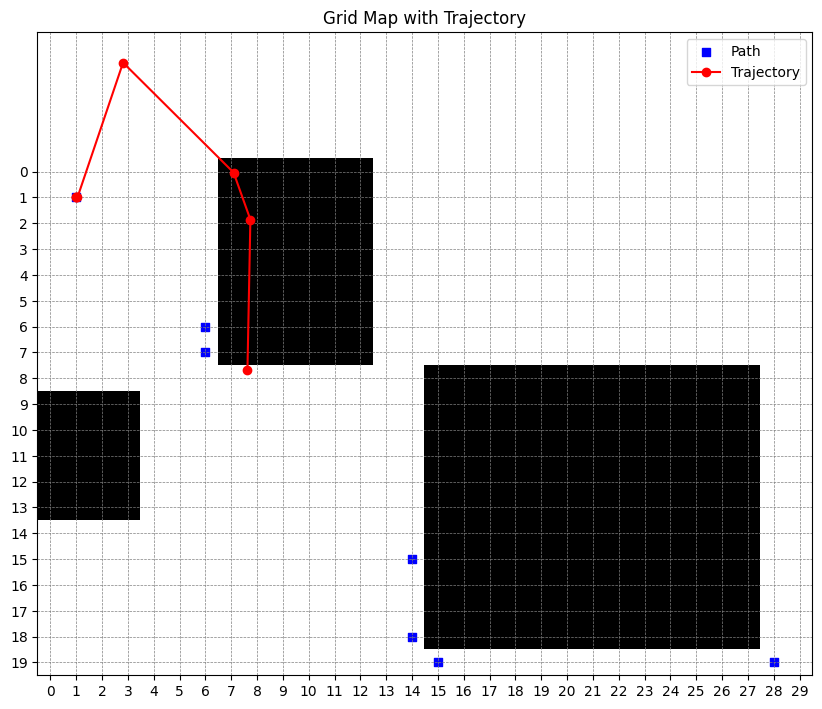

wl, wr:  468 -445
Position:  [7.303220304583674, 11.726441795646032]
Angle:  -863.4081670250613
Kalman position used:  [481.55266170407185, 1026.9485536146508]
Kalman angle used:  -567.906845796484
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [481.55266170407185, 1026.9485536146508]
x_diff:  118.44733829592815  y_diff:  -426.9485536146508  distance:  443.07430458449335
my angle:  -567.906845796484
waypoint angle:  -1.3001745432279699
angleDistance:  1.1199936070933099
Speed:  0.0 4.517307548609683
Motor commands:  641.6219376316153 -611.0685120301098
Kalman prediction:  (163.8595746433279, 747.5084609936279, -134.22685909422222)
calculated position:  [4.815526617040718, 10.269485536146508]
calculated angle:  4.5406132891497535
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736623, 1.8610339311258783, 7.682772635140485,

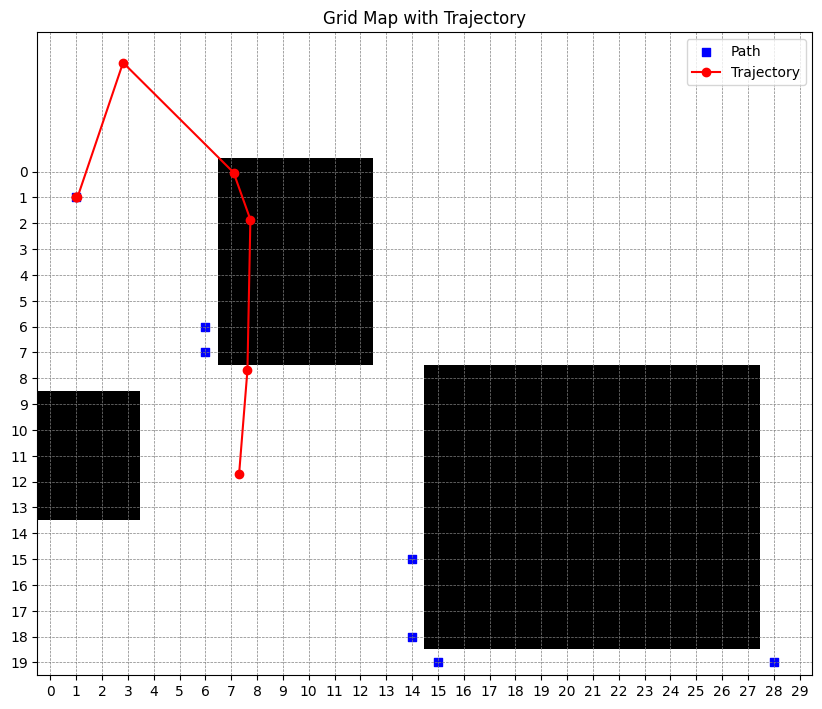

wl, wr:  641 -611
Position:  [4.815526617040718, 10.269485536146508]
Angle:  -567.906845796484
Kalman position used:  [163.8595746433279, 747.5084609936279]
Kalman angle used:  -134.22685909422222
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [163.8595746433279, 747.5084609936279]
x_diff:  436.1404253566721  y_diff:  -147.50846099362786  distance:  460.4098355758785
my angle:  -134.22685909422222
waypoint angle:  -0.3261360110085199
angleDistance:  1.953831632442384
Speed:  0.0 6.283185307179586
Motor commands:  892.4407930852168 -849.9436124621112
Kalman prediction:  (-223.36217486640538, 296.24775641827335, 475.26205605791216)
calculated position:  [1.638595746433279, 7.475084609936278]
calculated angle:  4.945695459805606
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736623, 1.8610339311258783, 7.

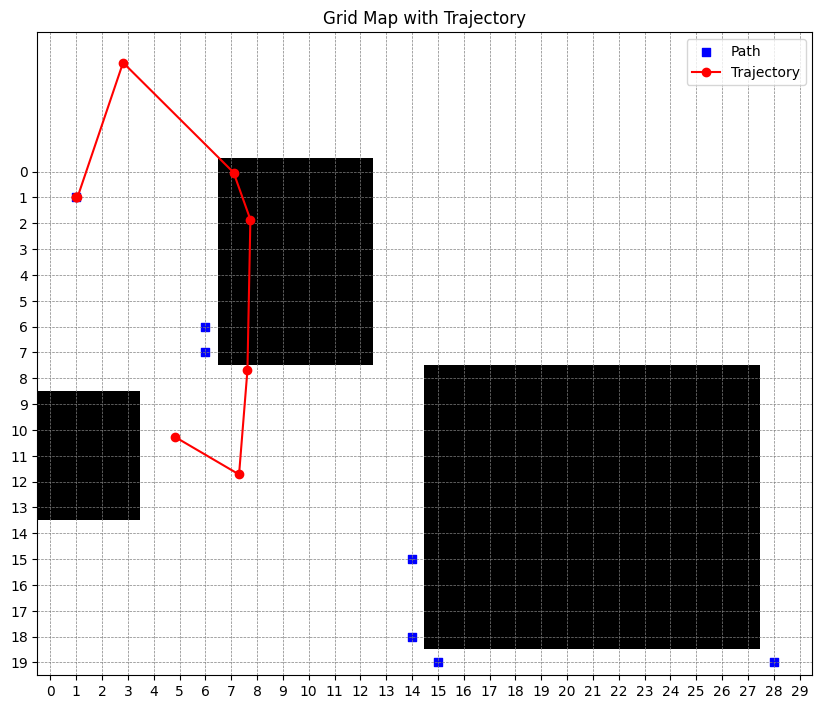

wl, wr:  892 -849
Position:  [1.638595746433279, 7.475084609936278]
Angle:  -134.22685909422222
Kalman position used:  [-223.36217486640538, 296.24775641827335]
Kalman angle used:  475.26205605791216
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [-223.36217486640538, 296.24775641827335]
x_diff:  823.3621748664054  y_diff:  303.75224358172665  distance:  877.6050914173583
my angle:  475.26205605791216
waypoint angle:  0.35342692915001694
angleDistance:  2.6134542168864137
Speed:  0.0 6.283185307179586
Motor commands:  892.4407930852168 -849.9436124621112
Kalman prediction:  (-580.7699663107289, -137.47638628292628, 1051.3238756703495)
calculated position:  [-2.2336217486640537, 2.9624775641827337]
calculated angle:  4.965635815520152
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279] [1.0, 1.0, 1.0, -4.215687010419889, 0.0390424228736

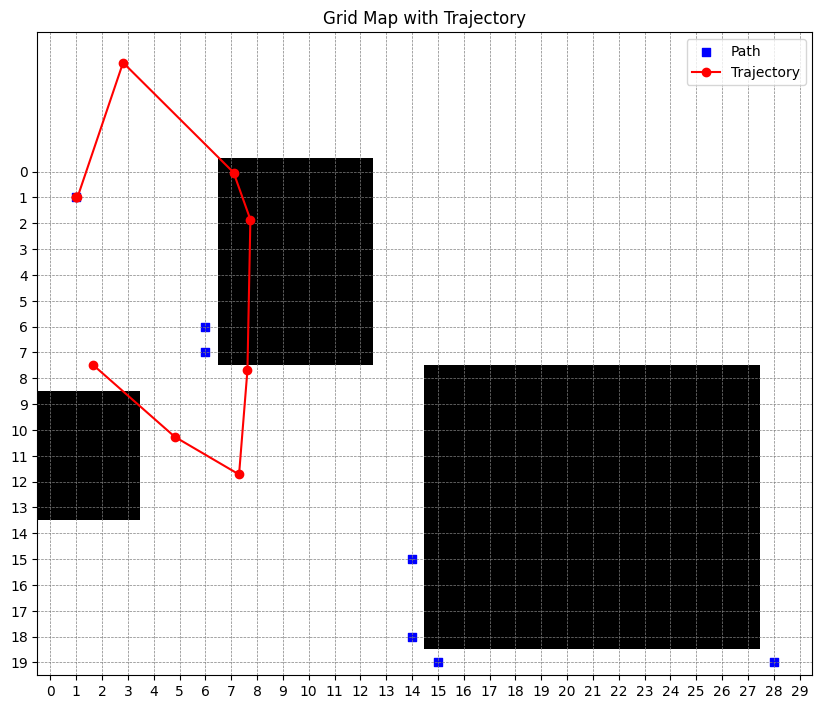

wl, wr:  892 -849
Position:  [-2.2336217486640537, 2.9624775641827337]
Angle:  475.26205605791216
Kalman position used:  [-580.7699663107289, -137.47638628292628]
Kalman angle used:  1051.3238756703495
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [-580.7699663107289, -137.47638628292628]
x_diff:  1180.769966310729  y_diff:  737.4763862829263  distance:  1392.1526976831112
my angle:  1051.3238756703495
waypoint angle:  0.5582918018588606
angleDistance:  -1.4736375694996902
Speed:  0.0 -5.943671530315417
Motor commands:  -844.2174908149826 804.016657919031
Kalman prediction:  (-346.352288730317, -609.2739367263653, 511.328255007499)
calculated position:  [-5.8076996631072895, -1.3747638628292629]
calculated angle:  1.1403786418112176
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279, -2.2336217486640537] [1.0, 1.0, 1.0, -4.21568701041

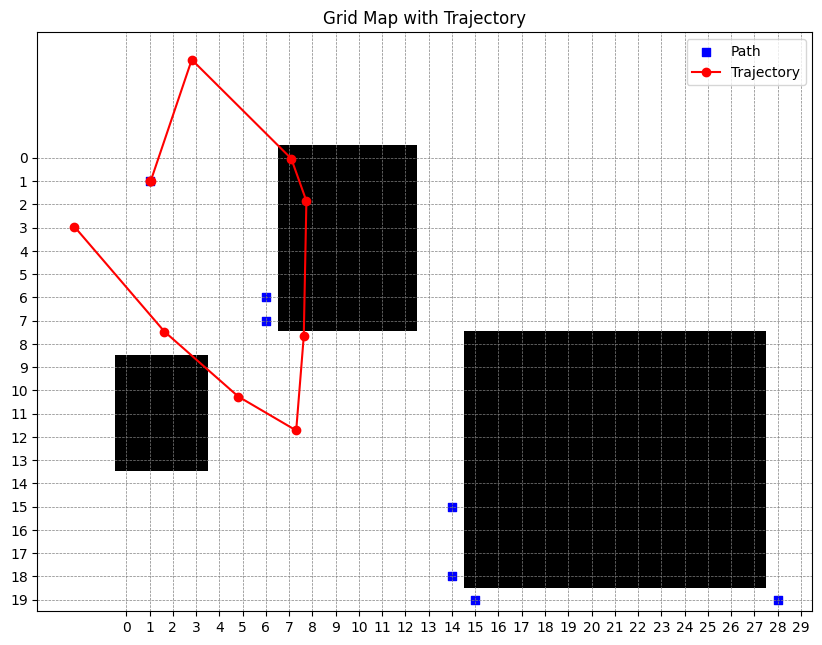

wl, wr:  -844 804
Position:  [-5.8076996631072895, -1.3747638628292629]
Angle:  1051.3238756703495
Kalman position used:  [-346.352288730317, -609.2739367263653]
Kalman angle used:  511.328255007499
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [-346.352288730317, -609.2739367263653]
x_diff:  946.352288730317  y_diff:  1209.2739367263653  distance:  1535.5540070055467
my angle:  511.328255007499
waypoint angle:  0.9067686313891291
angleDistance:  -1.4834764945634227
Speed:  0.0 -5.983355194739138
Motor commands:  -849.8540142054936 809.3847754338035
Kalman prediction:  (59.16099617099121, -988.0706415701134, -57.45713615811712)
calculated position:  [-3.4635228873031703, -6.092739367263652]
calculated angle:  1.4927418467416729
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279, -2.2336217486640537, -5.8076996631072895] [1.0, 1.0, 1.0

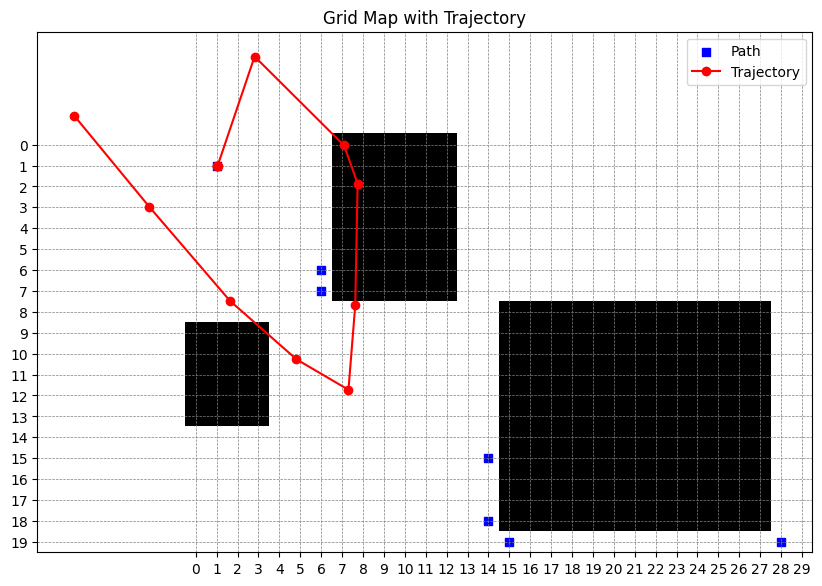

wl, wr:  -849 809
Position:  [-3.4635228873031703, -6.092739367263652]
Angle:  511.328255007499
Kalman position used:  [59.16099617099121, -988.0706415701134]
Kalman angle used:  -57.45713615811712
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [59.16099617099121, -988.0706415701134]
x_diff:  540.8390038290088  y_diff:  1588.0706415701134  distance:  1677.6397678523438
my angle:  -57.45713615811712
waypoint angle:  1.2425527365539608
angleDistance:  2.1510211300548114
Speed:  0.0 6.283185307179586
Motor commands:  892.4407930852168 -849.9436124621112
Kalman prediction:  (368.6834426195363, -1384.9747865627835, 458.4519964219121)
calculated position:  [0.5916099617099121, -9.880706415701134]
calculated angle:  0.03400940257608909
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279, -2.2336217486640537, -5.8076996631072895, -3.46352288730

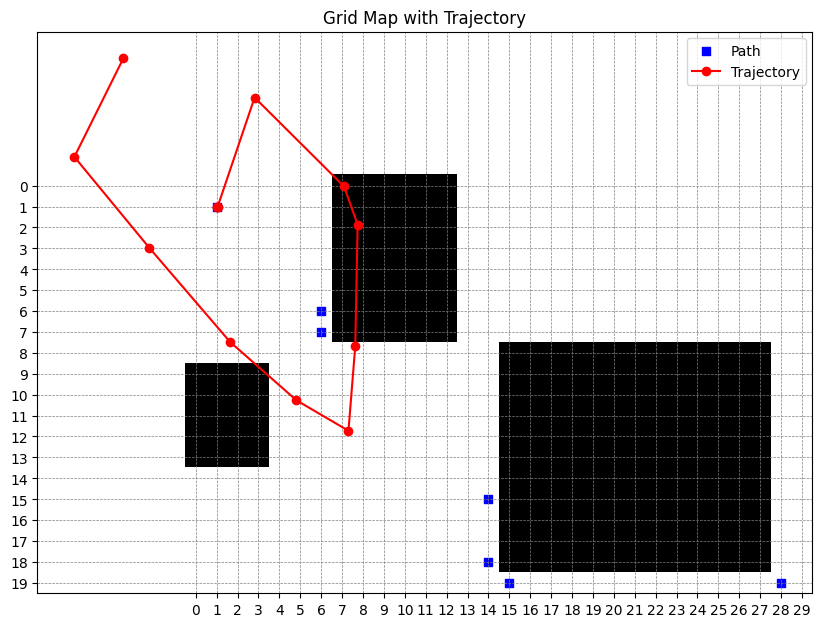

wl, wr:  892 -849
Position:  [0.5916099617099121, -9.880706415701134]
Angle:  -57.45713615811712
Kalman position used:  [368.6834426195363, -1384.9747865627835]
Kalman angle used:  458.4519964219121
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [368.6834426195363, -1384.9747865627835]
x_diff:  231.31655738046368  y_diff:  1984.9747865627835  distance:  1998.4074291816264
my angle:  458.4519964219121
waypoint angle:  1.454785832819319
angleDistance:  1.6753168350169965
Speed:  0.0 6.283185307179586
Motor commands:  892.4407930852168 -849.9436124621112
Kalman prediction:  (878.6515215598703, -1499.2979225698577, 994.1429453616137)
calculated position:  [3.686834426195363, -13.849747865627835]
calculated angle:  0.7219467938792619
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279, -2.2336217486640537, -5.8076996631072895, -3.46352288730

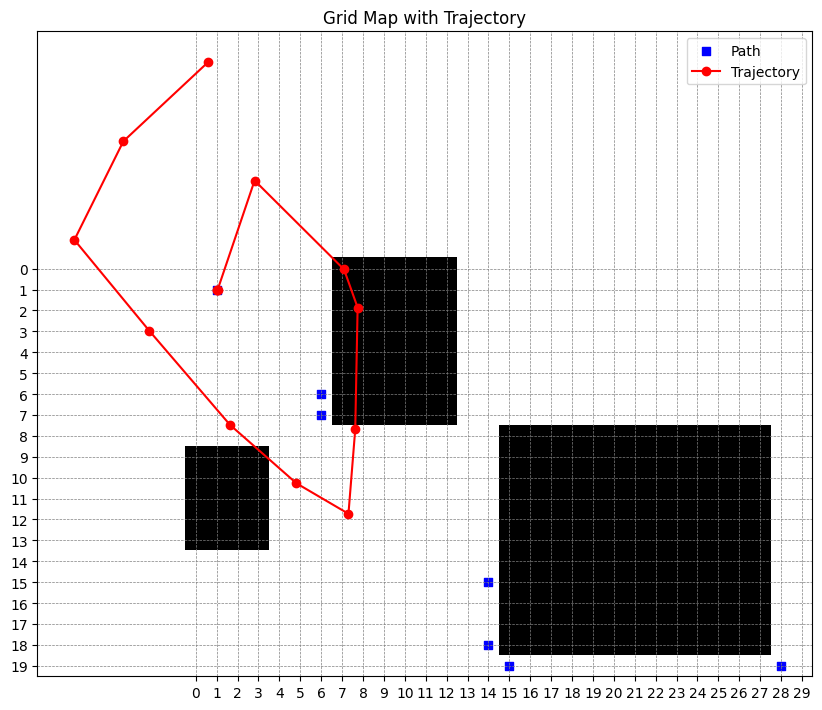

wl, wr:  892 -849
Position:  [3.686834426195363, -13.849747865627835]
Angle:  458.4519964219121
Kalman position used:  [878.6515215598703, -1499.2979225698577]
Kalman angle used:  994.1429453616137
current objective:  1
objective:  (np.int64(600), np.int64(600))  position:  [878.6515215598703, -1499.2979225698577]
x_diff:  -278.6515215598703  y_diff:  2099.2979225698577  distance:  2117.7106596921476
my angle:  994.1429453616137
waypoint angle:  1.7027604982289364
angleDistance:  0.3030936709898846
Speed:  0.0 1.2224778063258679
Motor commands:  173.63630223668508 -165.36790689208104
Kalman prediction:  (896.8538086160552, -1393.9726997852663, 1103.7016170985648)
calculated position:  [8.786515215598703, -14.992979225698578]
calculated angle:  1.5830384981879178
Trajectory:  [1.0, 1.0, 1.0491571429886697, 2.8136490620796315, 7.091745809672011, 7.74174355232851, 7.6280664613263, 7.303220304583674, 4.815526617040718, 1.638595746433279, -2.2336217486640537, -5.8076996631072895, -3.4635228

KeyboardInterrupt: 

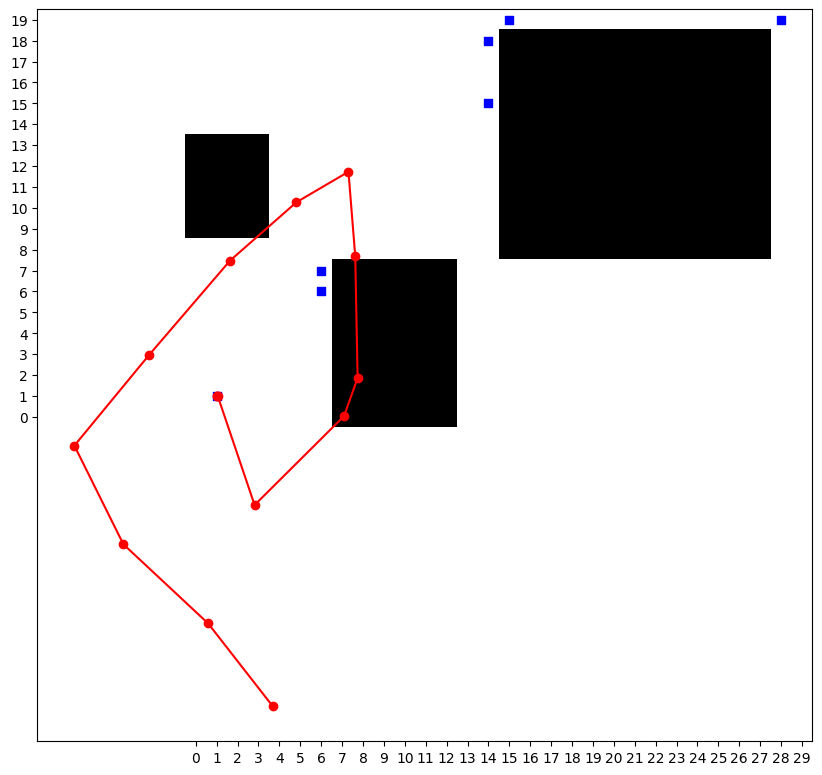

In [9]:
x_trajectory = []
y_trajectory = []
kalman_positions = []

dt = 0.15

iter = 1

goal = False

map = matrix

# initial position and angle
position = [1, 1]
goal_pos = (19, 28)
angle = 0

thymio.set_timestep(dt)

# leds_off()

while not goal:
    print("Position: ", position)
    # print("position 0: ", position[0])
    # print("position 1: ", position[1])
    print("Angle: ", angle)

    if (iter == 1):
        print("First iteration")

        thymio.set_pose(position, angle)

        print("Computing path")
        # print("Map shape: ", map.shape)
        path = globalPlanning.dijkstra(map, tuple(position), goal_pos)
        print("Path: ", path)
        thymio.set_path(path)
        plotter.set_map(map, position, goal_pos)
        plotter.plot_path(thymio.get_path_cells())
        print("Path: ", thymio.get_path_cells())
        filter.initialize_position(thymio.get_position()[0], thymio.get_position()[1], angle)
        filter.set_lastKalman_time()

    # check if camera is obstructed
    if position is not None:
        thymio.update_pose(position, angle)
        x_trajectory.append(float(position[0]))
        y_trajectory.append(float(position[1]))
        # camera measuerement that will then be used for the Kalman filter
        measurement = np.array([thymio.get_position()[0], thymio.get_position()[1], angle])
        # filter.kalman_update(measurement)
        # print("Kalman update: ", filter.get_state())
    
    # get the state from the Kalman filter
    # the result will depend on the mode of the filter
    x, y, angle = filter.get_state()
    kalman_position = [x, y]
    kalman_positions.append(position)
    print("Kalman position used: ", kalman_position)
    print("Kalman angle used: ", angle)

    # check if the robot is detecting an obstacle
    # tmclient function to get the proximity sensors
    prox = sensor_data()
    if (localPlanning.is_obstacle_avoidance(prox)):
        # move with local planning until the robot is not back on the path
        wl, wr = localPlanning.obstacle_avoidance(prox)
        v, w = thymio.inverseDifferentialDrive(wl, wr)
    else:
        # move with global planning
        v, w, wl, wr, goal = thymio.move(kalman_position, angle)

    print("Speed: ", thymio.convert_speed_cells(v), w)
    print("Motor commands: ", wl, wr)

    # update the Kalman filter
    filter.kalman_prediction(wl, wr)
    print("Kalman prediction: ", filter.get_state())

    # tmdclient function to move the motors
    wl = int(wl)
    wr = int(wr)

    if abs(w) < 1e-6:
        # treat as a straight line
        position[0] = kalman_position[0] + v * dt * math.cos(angle)
        position[1] = kalman_position[1] + v * dt * math.sin(angle)
    else:
        # use the circular motion equations
        position[0] = kalman_position[0] + (v / w) * (math.sin(angle + w * dt) - math.sin(angle))
        position[1] = kalman_position[1] - (v / w) * (math.cos(angle + w * dt) - math.cos(angle))


    position[0] = thymio.mm_to_cells(position[0])
    position[1] = thymio.mm_to_cells(position[1])

    print("calculated position: ", position)

    c_angle = (angle + w*dt) % (2 * math.pi)
    print("calculated angle: ", c_angle)
    
    print("Trajectory: ", x_trajectory, y_trajectory)
    plotter.plot_trajectory(x_trajectory, y_trajectory)

    print("wl, wr: ", wl, wr)
    motor_go(wl, wr)
    
    
    # sleep for a while
    iter += 1
    time.sleep(dt)

motor_stop()
leds_go_crazy()
leds_off()